KeyError: 'shapeName'

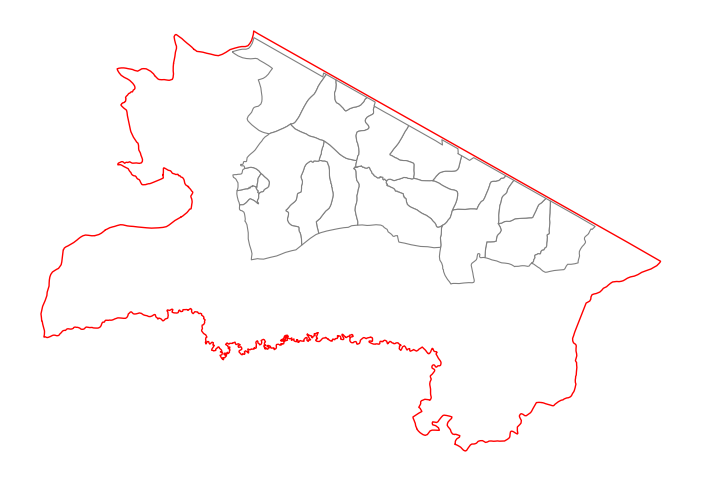

In [7]:
import pandas as pd  
import geopandas as gpd
import fiona
import shapely
import pyogrio
import matplotlib.pyplot as plt

wards = gpd.read_file("Maps/TZAmap_wards.shp")
districts = gpd.read_file("Maps/TZAmap_districts.shp")

# Filter the district by its name (e.g., "Tarime")
selected_district = districts[districts["shapeName"] == "Tarime"]

# Perform a spatial join to find the wards within the selected district
wards_in_district = gpd.sjoin(wards, selected_district, how="inner", predicate="within")

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the wards in the selected district
wards_in_district.plot(ax=ax, edgecolor="grey", linewidth=0.8, color="white")

# Plot the selected district's boundary 
selected_district.plot(ax=ax, edgecolor="red", linewidth=1, facecolor="none")

# Remove the axis
plt.axis("off")

# Label each ward by plotting the ward name at the centre of each ward
for idx, row in wards_in_district.iterrows():  # Iterate through the rows of the GeoDataFrame
    # Get the centroid of each district
    centroid = row.geometry.centroid
    # Add the ward name at the centroid's coordinates
    ax.text(centroid.x, centroid.y, row["shapeName"], fontsize=8, ha="center", color="black")  # Add the label

# Label graph
plt.title("Wards within District: Tarime")

# Show the plot
plt.show()

